# AI for Dynamic Grid Management and Load Balancing

## 1) Problem Statement
- This project aims to develop an intelligent system for managing and optimizing electricity distribution in power grids using real-time data and advanced AI techniques.

## 2) Data Collection
-  Data Source: https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data
- This dataset has 10000 rows and 14 columns

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [171]:
smart_grid = pd.read_csv("data/Power_Consumption.csv")
smart_grid.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [172]:
smart_grid.tail()

tau1      tau2      tau3      tau4        p1        p2        p3  \
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      stab     stabf  
9995 -1.236256  0.601709  0.779642  0.813512  0.608385  0.023892  unstable  
9996 -1.733414  0.502079  0.567242  0.285880  0.366120 -0.025803    stable  
9997 -1.975373  0.487838  0.986505  0.149286  0.145984 -0.031810    stable  
9998 -0.898510  0.365246  0.587558  0.889118  0.818391  0.037789  unstable  
9999 -0.570329  0.073056  0.505441  0.378761  0.942631  0.045263  unstable

In [173]:
smart_grid.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [174]:
smart_grid.columns = (smart_grid.columns.str.replace("tau", "delay").str.replace("p", "power").str.replace("g", "adapt"))
smart_grid.head()

delay1    delay2    delay3    delay4    power1    power2    power3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

     power4    adapt1    adapt2    adapt3    adapt4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [175]:
smart_grid.shape

(10000, 14)

## Dataset Information

**Features**
- tau[x]: reaction time of participant (real from the range [0.5, 10]s). tau1 -  the value for electricity producer
- p[x]: nominal **power consumed**(negative)/produced(positive)(real). For consumers from the range [-0.5, -2]s^-2; p1 = abs(p2+p3+p4)
- g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 -  the value for electricity producer

**Targets**
- stab: the maximal real part of the characteritic equation root i.e. a number representing grid stability (if positive - the system is linearly unstable)(real)
- stabf: the stability label of the system i.e. the categorical version of stab (categorical: stable/unstable)

**Info from the dataset link above


## Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### Check Missing Values

In [176]:
smart_grid.isna().sum()

delay1    0
delay2    0
delay3    0
delay4    0
power1    0
power2    0
power3    0
power4    0
adapt1    0
adapt2    0
adapt3    0
adapt4    0
stab      0
stabf     0
dtype: int64

**There are no missing values in the dataset**

### Check duplicates

In [177]:
smart_grid.duplicated().sum()

0

**There are no duplicate values in the dataset**

### Check data types

In [178]:
# Check Null and Dtypes
smart_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   delay1  10000 non-null  float64
 1   delay2  10000 non-null  float64
 2   delay3  10000 non-null  float64
 3   delay4  10000 non-null  float64
 4   power1  10000 non-null  float64
 5   power2  10000 non-null  float64
 6   power3  10000 non-null  float64
 7   power4  10000 non-null  float64
 8   adapt1  10000 non-null  float64
 9   adapt2  10000 non-null  float64
 10  adapt3  10000 non-null  float64
 11  adapt4  10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


### Checking the number of unique values of each column

In [179]:
smart_grid.nunique()

delay1    10000
delay2    10000
delay3    10000
delay4    10000
power1    10000
power2    10000
power3    10000
power4    10000
adapt1    10000
adapt2    10000
adapt3    10000
adapt4    10000
stab      10000
stabf         2
dtype: int64

### Check statistics of each column

In [180]:
smart_grid.describe()

delay1        delay2        delay3        delay4        power1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.250000      5.250001      5.250004      5.249997      3.750000   
std        2.742548      2.742549      2.742549      2.742556      0.752160   
min        0.500793      0.500141      0.500788      0.500473      1.582590   
25%        2.874892      2.875140      2.875522      2.874950      3.218300   
50%        5.250004      5.249981      5.249979      5.249734      3.751025   
75%        7.624690      7.624893      7.624948      7.624838      4.282420   
max        9.999469      9.999837      9.999450      9.999443      5.864418   

             power2        power3        power4        adapt1        adapt2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -1.250000     -1.250000     -1.250000      0.525000      0.525000   
std        0.433035      0.433035      0.433035      0.274256      0.274255   
min       -1.999891     -1.999945     -1.999926      0.050009      0.050053   
25%       -1.624901     -1.625025     -1.624960      0.287521      0.287552   
50%       -1.249966     -1.249974     -1.250007      0.525009      0.525003   
75%       -0.874977     -0.875043     -0.875065      0.762435      0.762490   
max       -0.500108     -0.500072     -0.500025      0.999937      0.999944   

             adapt3        adapt4          stab  
count  10000.000000  10000.000000  10000.000000  
mean       0.525000      0.525000      0.015731  
std        0.274255      0.274255      0.036919  
min        0.050054      0.050028     -0.080760  
25%        0.287514      0.287494     -0.015557  
50%        0.525015      0.525002      0.017142  
75%        0.762440      0.762433      0.044878  
max        0.999982      0.999930      0.109403

#### Insights
- From above description of numerical data, the means of each of the variants of tau, p, g are almost the same
- All the standard deviations are almost the same for each of the variants of tau and g, however, they differ slightly for the variants of p i.e. column power1 differs from the rest of the variants of p
- The minimum and maximum are nearly identical for each variant of tau, and g, however for p, the variants power1 differs from the rest of the variants of p

### Checking the unique values for the categorical variables

In [181]:
print("Categories in 'stabf' variable: ", end= " ")
print(smart_grid['stabf'].unique())

Categories in 'stabf' variable:  ['unstable' 'stable']


In [182]:
smart_grid['stabf'].value_counts()

stabf
unstable    6380
stable      3620
Name: count, dtype: int64

## Adding columns for "Total Score" and "Average"

In [183]:
smart_grid['total_delay'] = smart_grid['delay1'] + smart_grid['delay2'] + smart_grid['delay3'] + smart_grid['delay4']
smart_grid['total_power'] = smart_grid['power1'] + smart_grid['power2'] + smart_grid['power3'] + smart_grid['power4']
smart_grid['total_adapt'] = smart_grid['adapt1'] + smart_grid['adapt2'] + smart_grid['adapt3'] + smart_grid['adapt4']

smart_grid['average_delay'] = smart_grid['total_delay']/4
smart_grid['average_power'] = smart_grid['total_power']/4
smart_grid['average_adapt'] = smart_grid['total_adapt']/4

KeyError: 'tau1'

In [49]:
smart_grid.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  \
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable   
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable   
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable   
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable   
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable   

   total_tau       total_p   total_g  average_tau     average_p  average_g  
0  24.200725 -2.886580e-15  3.355513     6.050181 -7.216450e-16   0.838878  
1  18.623519 -6.661338e-16  2.619754     4.655880 -1.665335e-16   0.654938  
2  22.081132  0.000000e+00  1.879027     5.520283  0.000000e+00   0.469757  
3  15.213218 -9.992007e-16  2.715051     3.803305 -2.498002e-16   0.678763  
4  25.544216  4.996004e-15  2.730430     6.386054  1.249001e-15   0.682607

# Univariate Analysis


### Distribution of Stab(Stability Indicator)

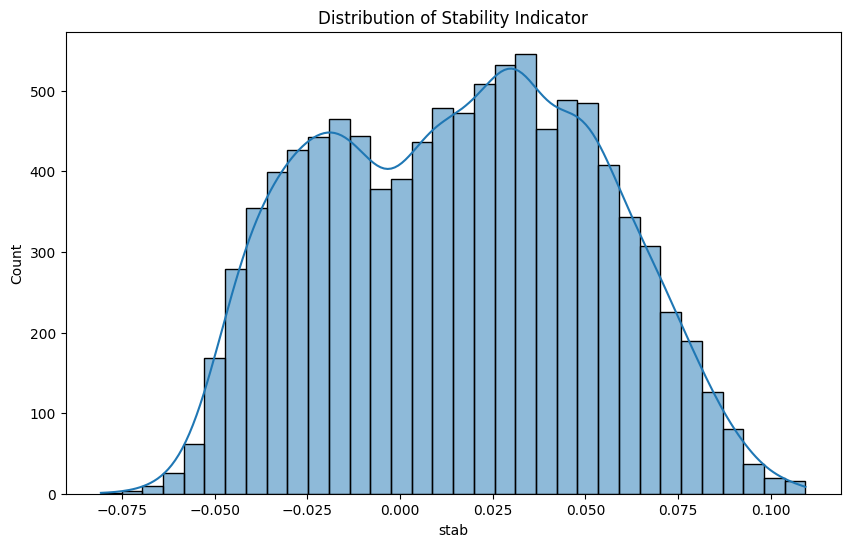

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(smart_grid['stab'], kde=True)
plt.title('Distribution of Stability Indicator')
plt.show()

### Countplot for Stability label (Stabf)

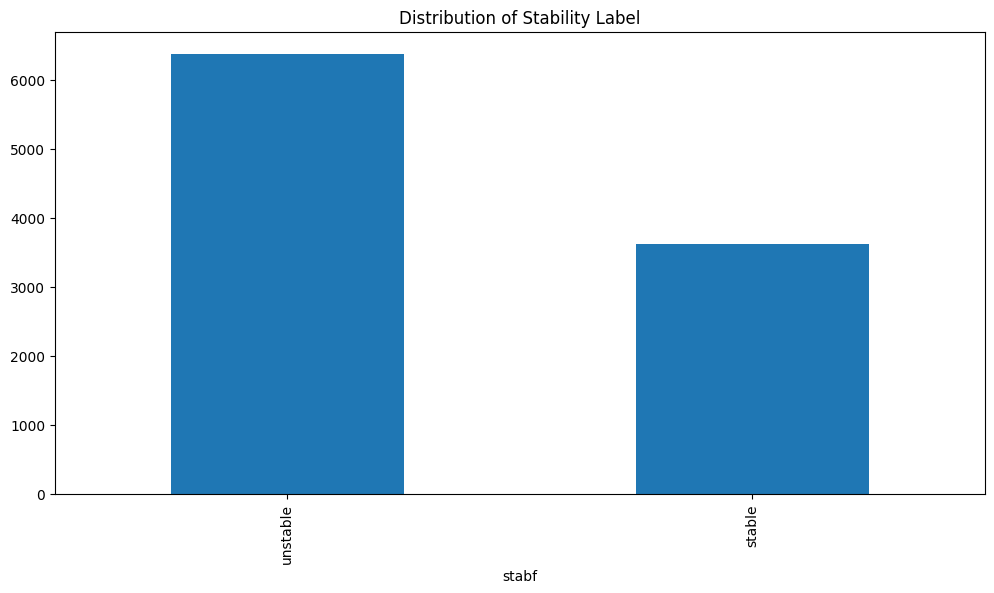

In [72]:
fig = plt.figure(figsize=(12,6))
#sns.countplot(smart_grid["stabf"])
smart_grid["stabf"].value_counts().plot(kind="bar")
plt.title("Distribution of Stability Label")
plt.show()

# Correlation Analysis

- Examining the relationship between the numerical variables

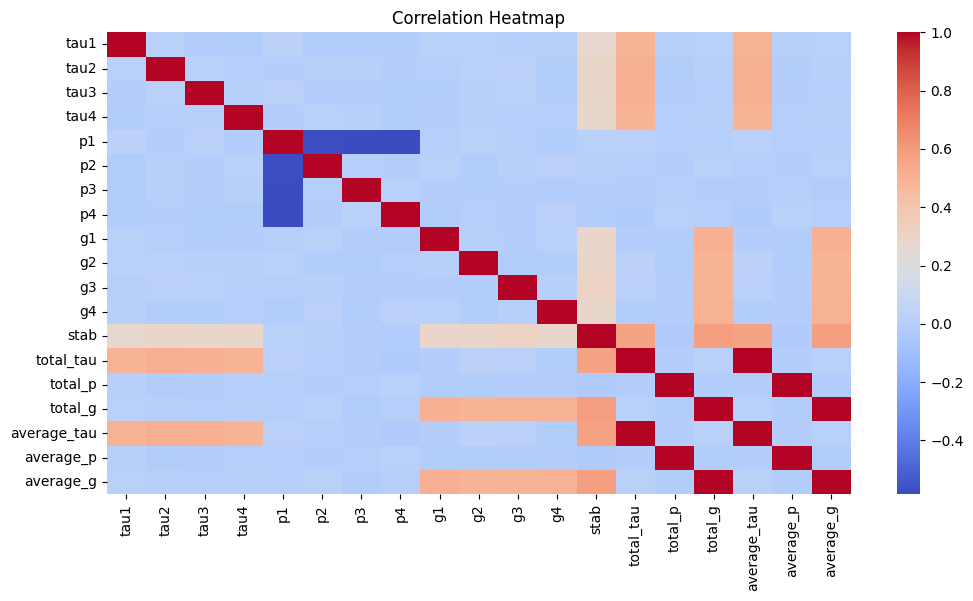

In [107]:
# Selecting only the numeric columns in the dataframe
numeric_cols = smart_grid.select_dtypes(include=np.number)

plt.figure(figsize=(12,6))
sns.heatmap(numeric_cols.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Distribution of tau columns

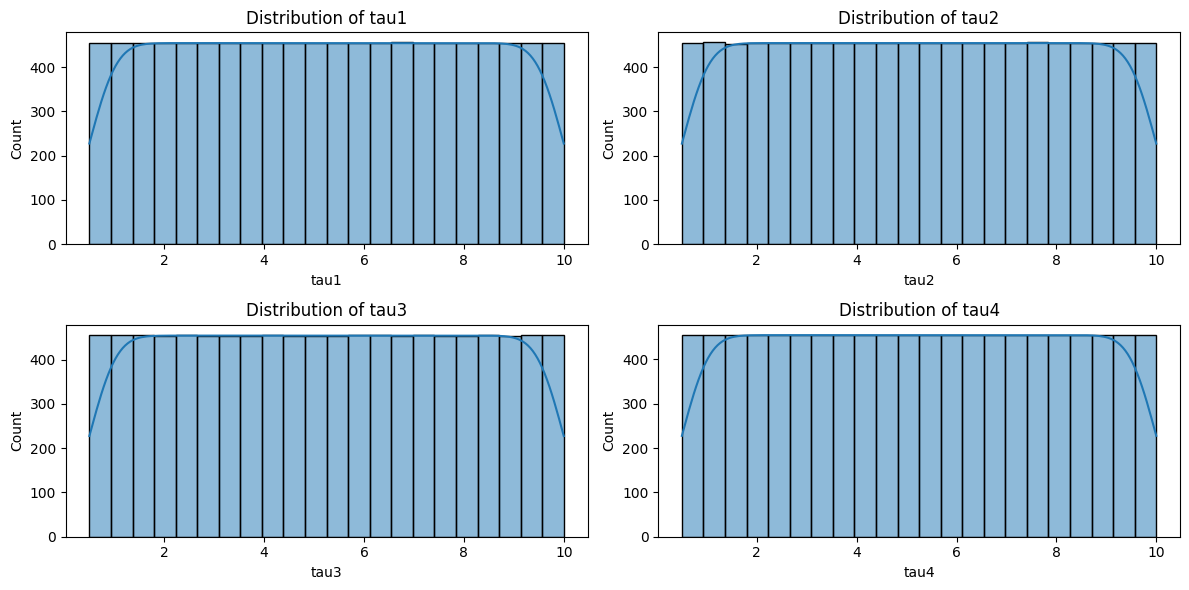

In [76]:
tau_columns = ["delay1", "delay2", "delay3", "delay4"]
plt.figure(figsize=(12,6))
for i,col in enumerate(tau_columns):
    plt.subplot(2,2,i+1)
    sns.histplot(smart_grid[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Insights
- Since the distributions of all the values in the columns of tau[x] are uniform, all the values have approximately the same frequency or probability of occurrence.
- This indicates there is no inherent trend in the values.

### Distribution of p columns

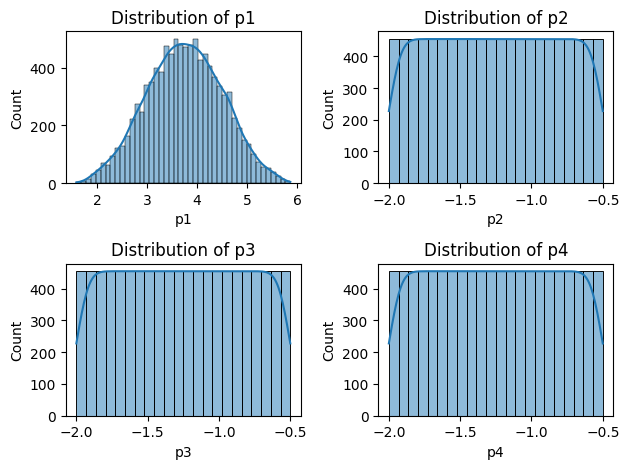

In [80]:
p_columns = ["power1", "power2", "power3", "power4"]
for i, col in enumerate(p_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(smart_grid[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Insights
- Similarly for power[x], since the distributions of all the values in the columns of power[x] (where x ranges from 2 to 4 inclusive, are uniform), all the values have approximately the same frequency or probability of occurrence.
- power1 has a normal distribution whereas the other columns of power[x] have a uniform distribution as power1 = abs(power2+power3+power4) 

### Distribution of g columns

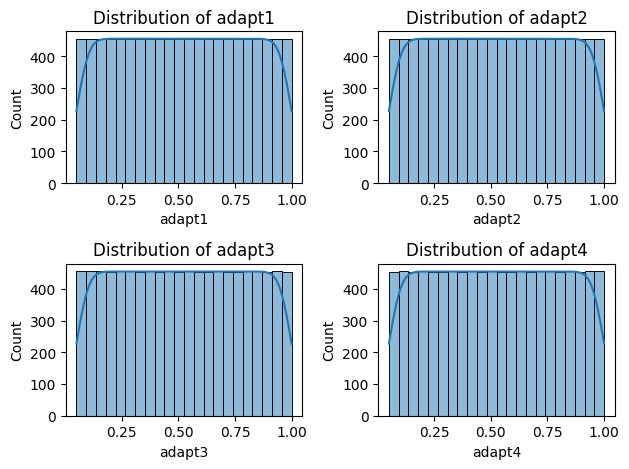

In [184]:
g_columns = ["adapt1","adapt2","adapt3","adapt4"]
for i, col in enumerate(g_columns):
    plt.subplot(2,2, i+1)
    sns.histplot(smart_grid[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Insights
- Since the distributions of all the values in the columns of g[x] are uniform, all the values have approximately the same frequency or probability of occurrence.
- This indicates there is no inherent trend in the values.

## Univariate Analysis 
- Checking for outliers for tau, p and g

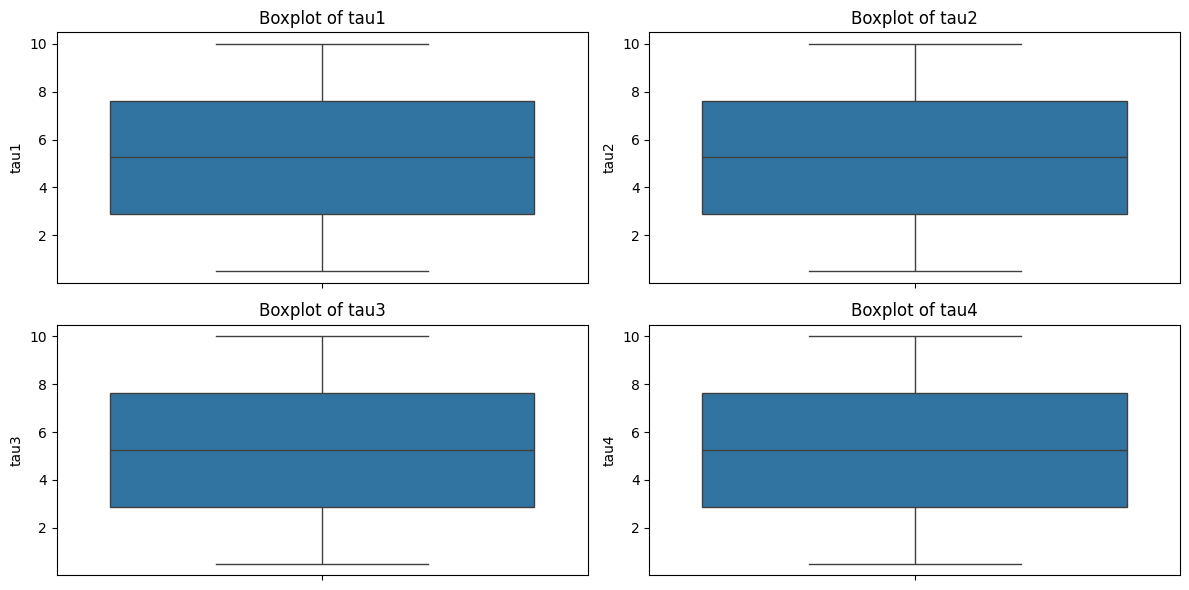

In [126]:
plt.figure(figsize=(12,6))
for i, col in enumerate(tau_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(smart_grid[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### Insights
- There are no outliers in tau1

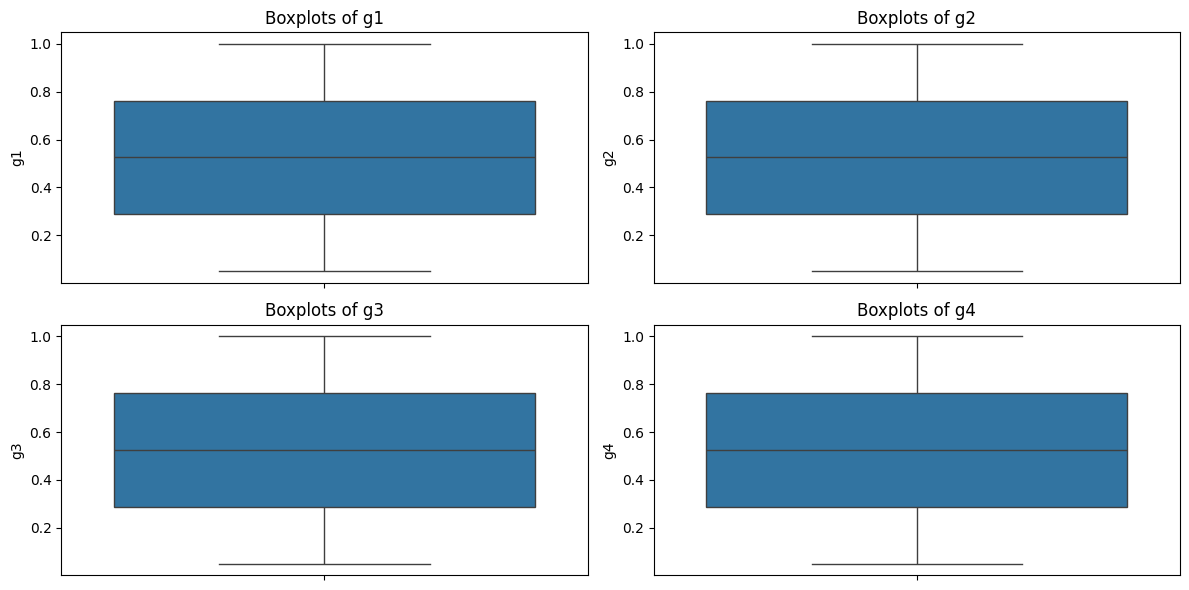

In [128]:
plt.figure(figsize=(12,6))
for i, col in enumerate(g_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(smart_grid[col])
    plt.title(f"Boxplots of {col}")
plt.tight_layout()
plt.show()

### Insights
- There are no outliers in g

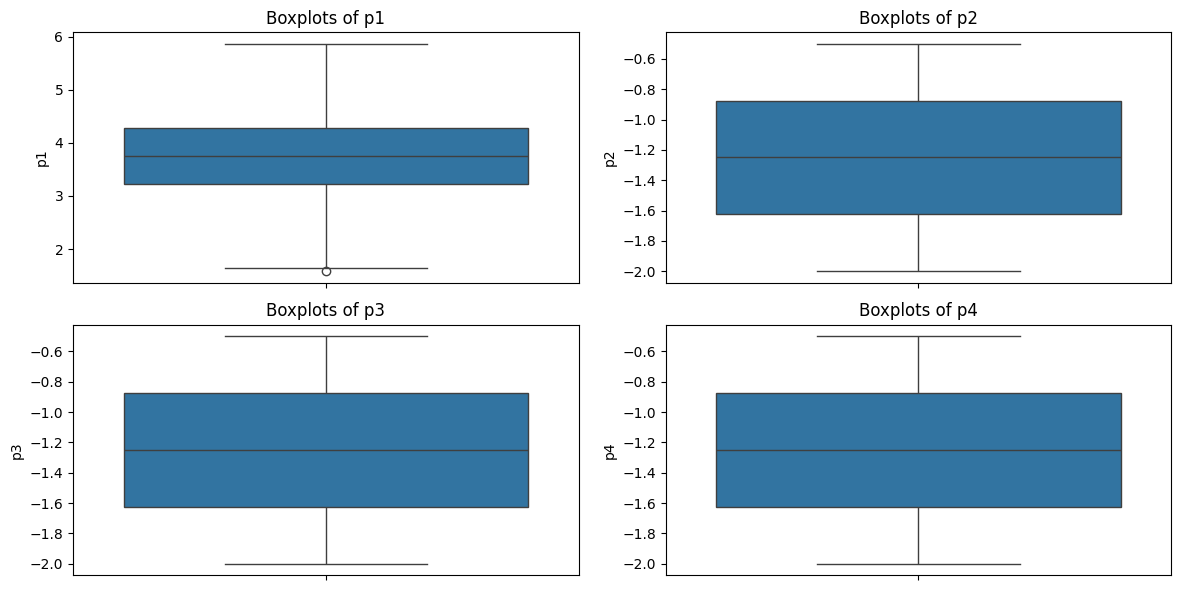

In [123]:
plt.figure(figsize=(12,6))
for i, col in enumerate(p_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(smart_grid[col])
    plt.title(f"Boxplots of {col}")
plt.tight_layout()
plt.show()

### Insights
- There is a single outlier in power1

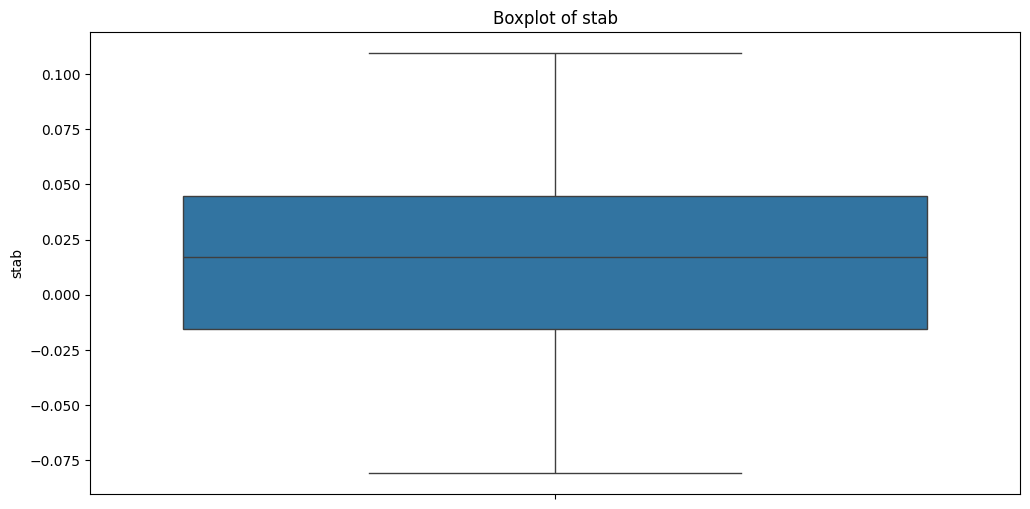

In [129]:
plt.figure(figsize=(12,6))
sns.boxplot(smart_grid["stab"])
plt.title("Boxplot of stab")
plt.show()

### Insights
- There are no outliers in stab

# Bivariate Analysis

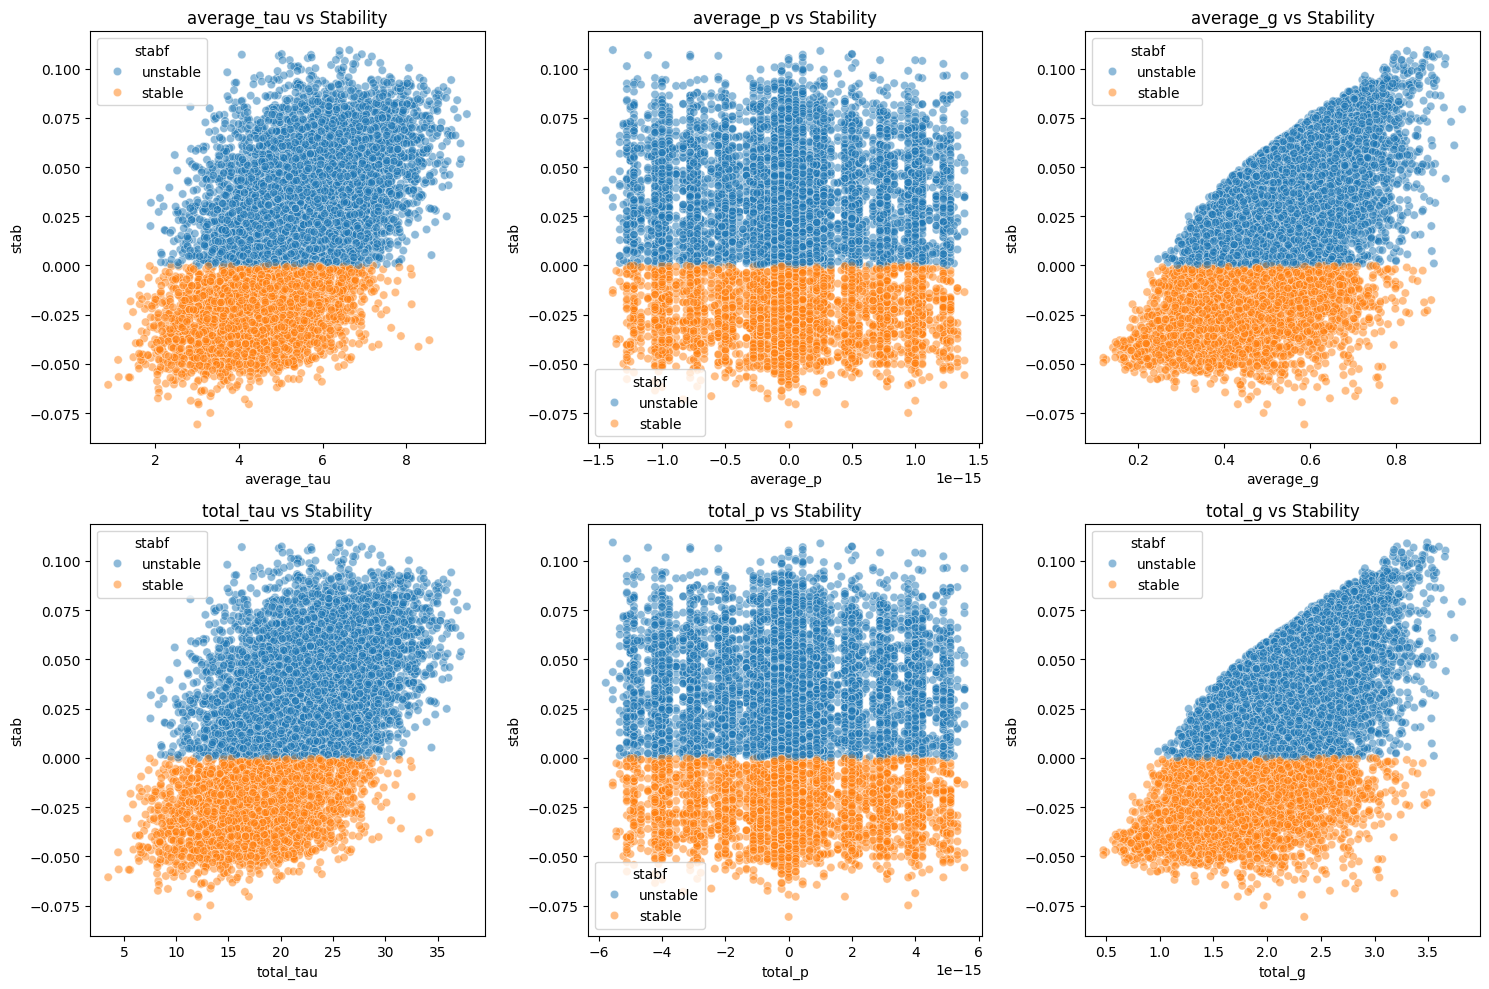

In [156]:
plt.figure(figsize=(15,10))
for i, col in enumerate(["average_tau", "average_p", "average_g", "total_tau", "total_p", "total_g"]):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=col, y= "stab",data=smart_grid, hue="stabf", alpha=0.5)
    plt.title(f"{col} vs Stability")
plt.tight_layout()
plt.show()

### Insights
- Here we can see that for the average and total of each of the columns of tau, p and g, the stab is stable only when it is below 0.00 and unstable above 0.000

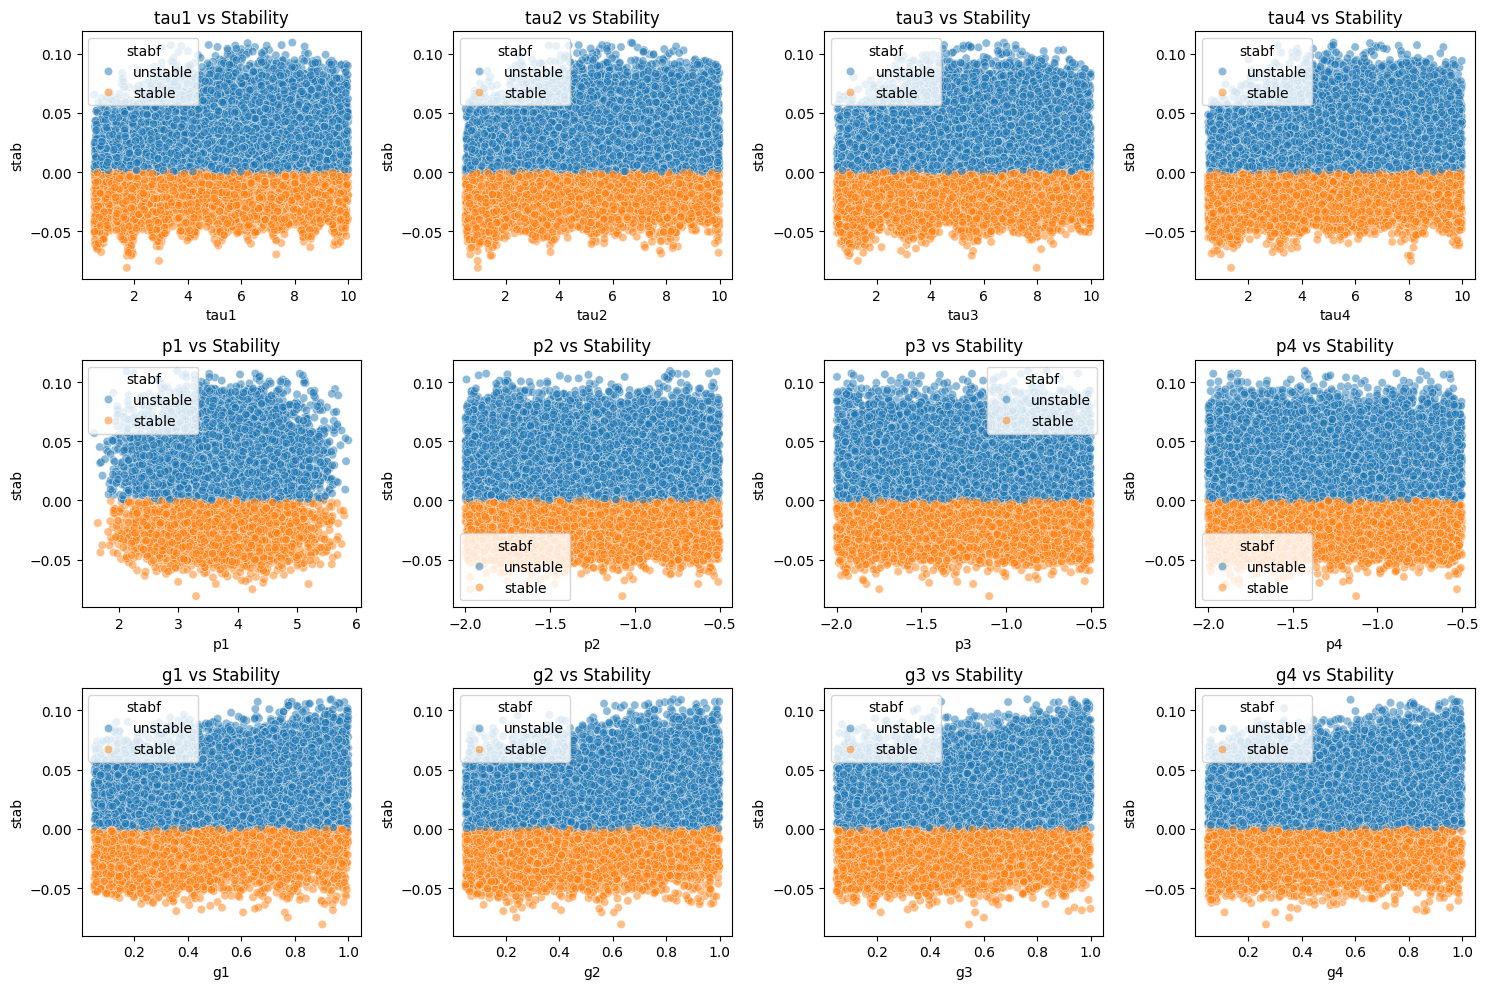

In [157]:
plt.figure(figsize=(15,10))
for i, col in enumerate(["delay1", "delay2", "delay3", "delay4","power1", "power2", "p3", "p4", "g1", "g2", "g3", "g4"]):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=col, y= "stab",data=smart_grid, hue="stabf", alpha=0.5)
    plt.title(f"{col} vs Stability")
plt.tight_layout()
plt.show()

### Insights
- Similarly as we saw above, here we can see that for each of the columns of tau, p and g, the stab is stable only when it is below 0.000 and unstable above 0.000

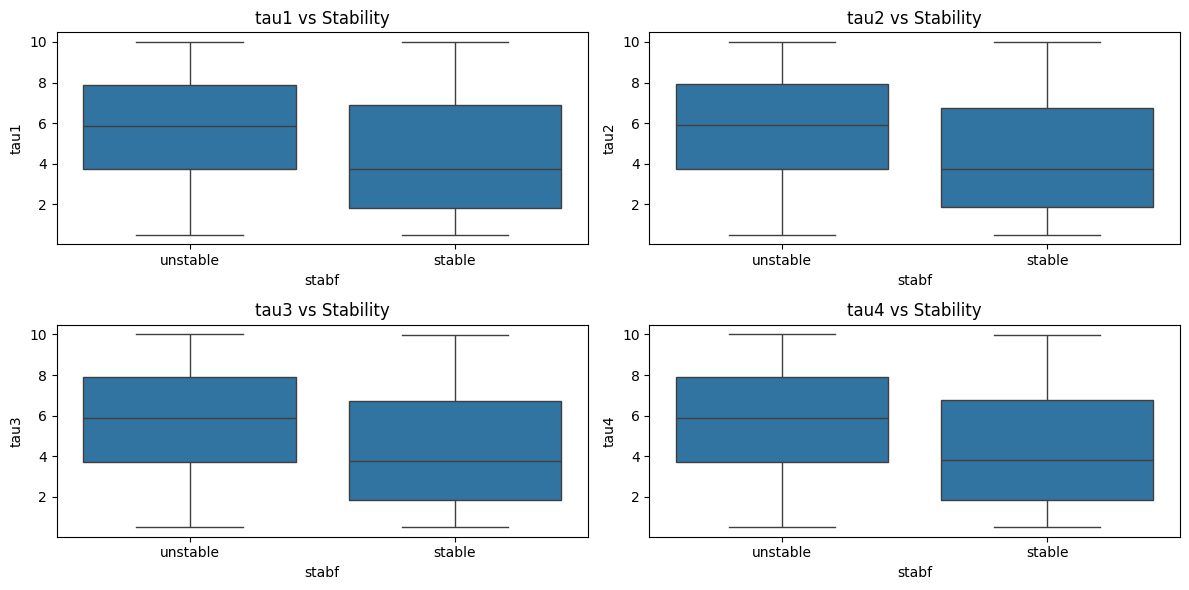

In [88]:
plt.figure(figsize=(12,6))
for i, col in enumerate(tau_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(x="stabf",y=col, data=smart_grid)
    plt.title(f"{col} vs Stability")
plt.tight_layout()
plt.show()

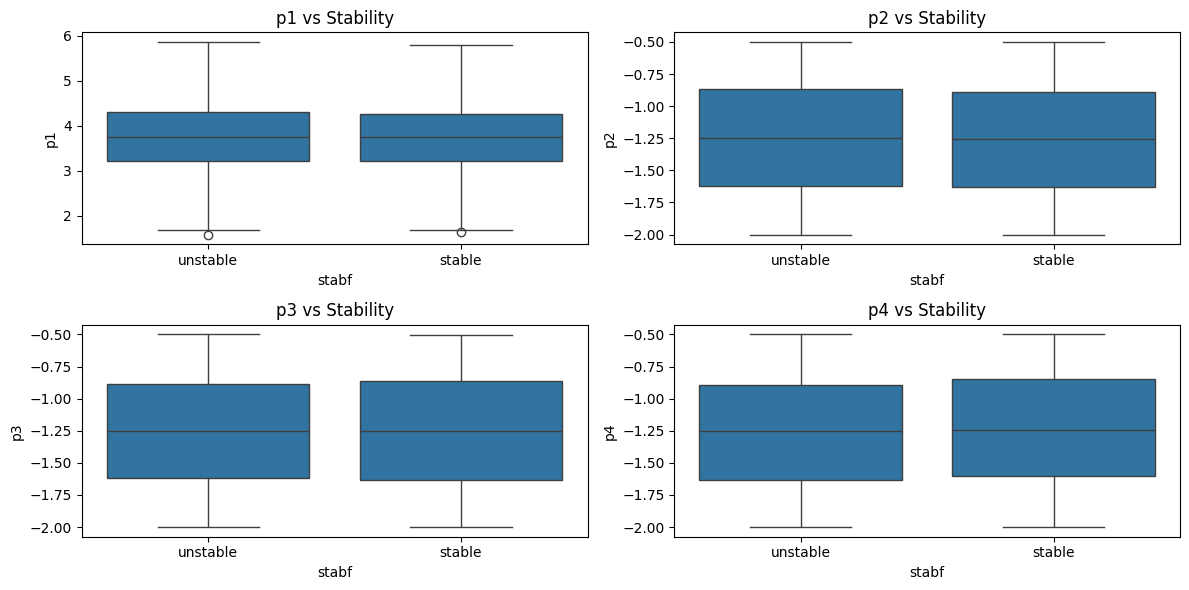

In [91]:
plt.figure(figsize=(12,6))
for i, col in enumerate(p_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(x="stabf", y=col, data=smart_grid)
    plt.title(f"{col} vs Stability")
plt.tight_layout()
plt.show()


Here we see there is an outlier in power1, and from the histogram above for power1, it is normally distributed, hence we will use Zscore to take care of the outlier.

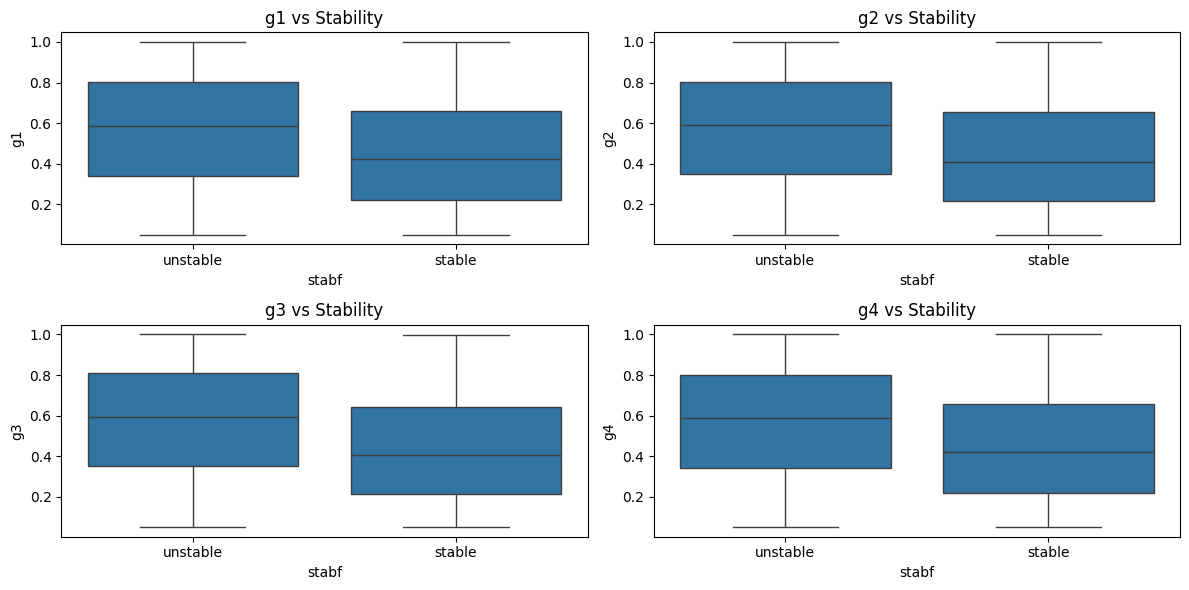

In [93]:
plt.figure(figsize=(12,6))
for i, col in enumerate(g_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(x="stabf", y=col, data=smart_grid)
    plt.title(f"{col} vs Stability")
plt.tight_layout()
plt.show()

In [152]:
def remove_outliers(smart_grid, col, threshold=3):
    zscores= np.abs(stats.zscore(smart_grid[col]))
    outlier_mask = zscores > threshold
    smart_grid_cleaned = smart_grid[~outlier_mask]
    return smart_grid_cleaned


smart_grid_new = remove_outliers(smart_grid, "power1", threshold=3)
smart_grid_new


tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      stab     stabf  \
0    -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable   
1    -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable   
2    -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable   
3    -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable   
4    -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -1.236256  0.601709  0.779642  0.813512  0.608385  0.023892  unstable   
9996 -1.733414  0.502079  0.567242  0.285880  0.366120 -0.025803    stable   
9997 -1.975373  0.487838  0.986505  0.149286  0.145984 -0.031810    stable   
9998 -0.898510  0.365246  0.587558  0.889118  0.818391  0.037789  unstable   
9999 -0.570329  0.073056  0.505441  0.378761  0.942631  0.045263  unstable   

      total_tau       total_p   total_g  average_tau     average_p  average_g  
0     24.200725 -2.886580e-15  3.355513     6.050181 -7.216450e-16   0.838878  
1     18.623519 -6.661338e-16  2.619754     4.655880 -1.665335e-16   0.654938  
2     22.081132  0.000000e+00  1.879027     5.520283  0.000000e+00   0.469757  
3     15.213218 -9.992007e-16  2.715051     3.803305 -2.498002e-16   0.678763  
4     25.544216  4.996004e-15  2.730430     6.386054  1.249001e-15   0.682607  
...         ...           ...       ...          ...           ...        ...  
9995  20.982353 -6.661338e-16  2.803247     5.245588 -1.665335e-16   0.700812  
9996  14.516833 -3.108624e-15  1.721321     3.629208 -7.771561e-16   0.430330  
9997  14.991362  1.998401e-15  1.769614     3.747840  4.996004e-16   0.442403  
9998  24.204326  4.107825e-15  2.660313     6.051082  1.026956e-15   0.665078  
9999  26.335150  3.330669e-15  1.899888     6.583787  8.326673e-16   0.474972  

[10000 rows x 20 columns]

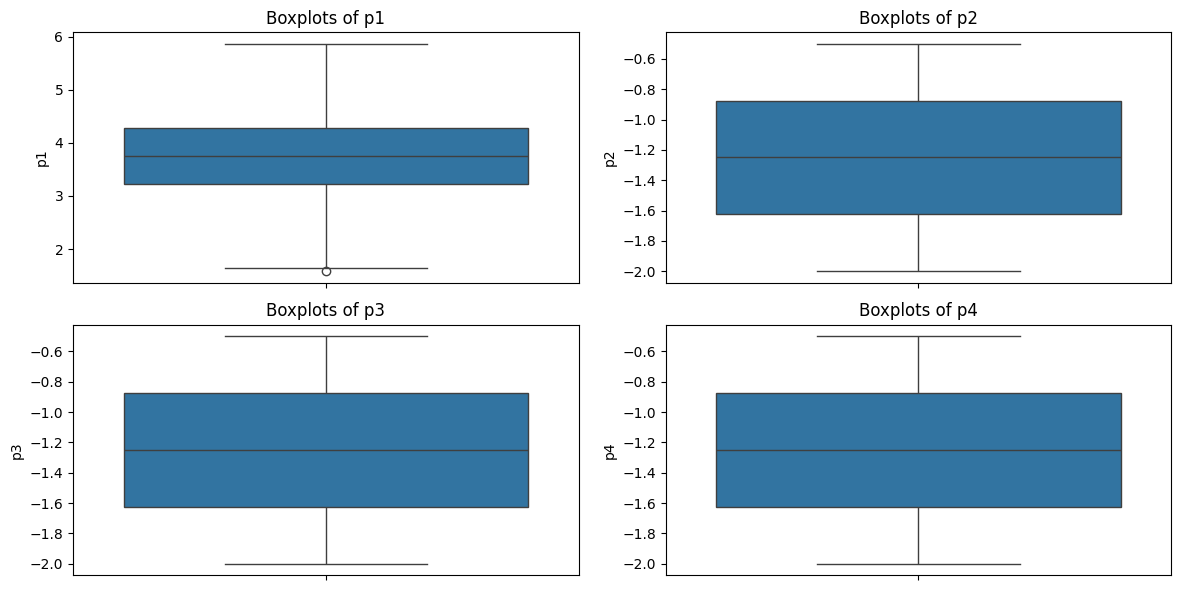

In [153]:
plt.figure(figsize=(12,6))
for i, col in enumerate(p_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(smart_grid_new[col])
    plt.title(f"Boxplots of {col}")
plt.tight_layout()
plt.show()

<Axes: xlabel='average_g', ylabel='Count'>

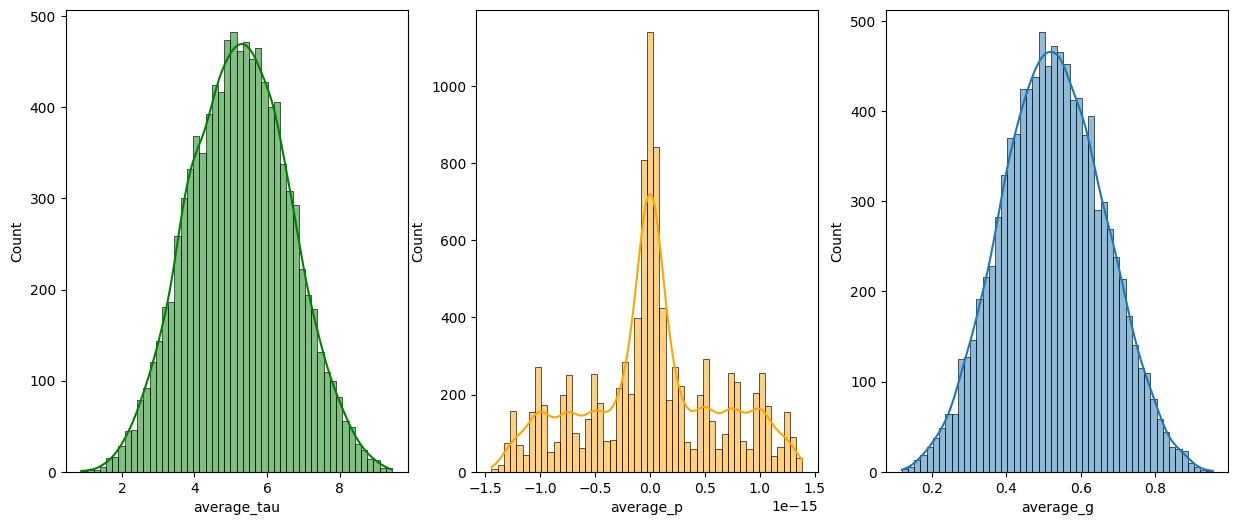

In [55]:
fig, axs = plt.subplots(1,3, figsize=(15,6))
plt.subplot(131)
sns.histplot(data=smart_grid,x="average_tau", bins=50, kde=True, color="g")
plt.subplot(132)
sns.histplot(data=smart_grid, x="average_p", bins=50, kde=True, color="orange")
plt.subplot(133)
sns.histplot(data=smart_grid, x="average_g", bins=50, kde=True)

<Axes: xlabel='total_g', ylabel='Count'>

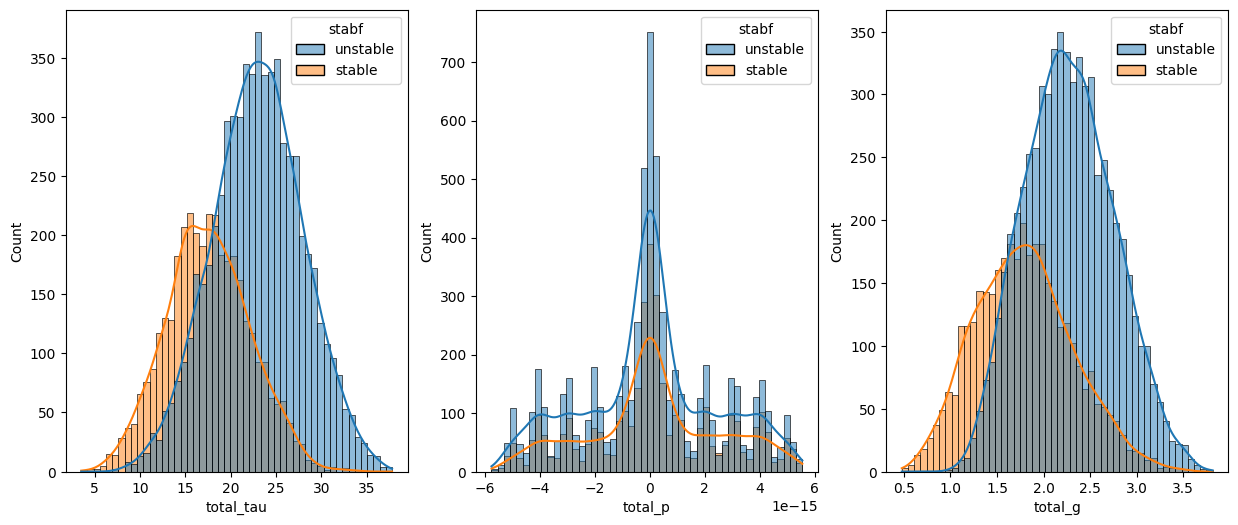

In [158]:
fig, axs = plt.subplots(1,3, figsize=(15,6))
plt.subplot(131)
sns.histplot(data=smart_grid,x="total_tau", bins=50, kde=True, color="g", hue="stabf")
plt.subplot(132)
sns.histplot(data=smart_grid, x="total_p", bins=50, kde=True, color="orange", hue="stabf")
plt.subplot(133)
sns.histplot(data=smart_grid, x="total_g", bins=50, kde=True, hue="stabf")